# Board Game Review Prediction
> Using Linear Regression/Random Forest Regression with Game information, it can predict Average game User rates. This data is from boardgamegeek, re-organized in scrapper

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Machine_Learning]
- image: images/bgr_heatmap.png

## Required Packages

In [14]:
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

plt.rcParams['figure.figsize'] = (8, 8)

from sklearn.model_selection import train_test_split

## Version Check

In [5]:
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.18.1
Matplotlib: 3.1.3
Seaborn: 0.10.0
Pandas: 1.0.1
Scikit-learn: 0.22.1


## Dataset Load
More data information is in [here](https://raw.githubusercontent.com/ThaWeatherman/scrapers/master/boardgamegeek/games.csv)

In [22]:
# Load the data
games = pd.read_csv('./dataset/games.csv')
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


## Exploratory Data Analysis

In [24]:
games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [25]:
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


Our purpose is to predict `average_rating`. But some rows contain 0 rating. So we should remove that.

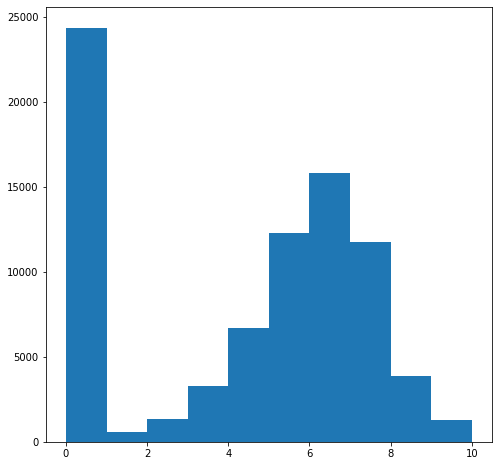

In [26]:
# Make a histogram of all the rating in the average_rating column
plt.hist(games['average_rating']);

In [27]:
# Print the first row of all the games with zero scores
print(games[games['average_rating'] == 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


This row is meaningless

In [28]:
# Print the first row of games with scores greater than 0
print(games[games['average_rating'] > 0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


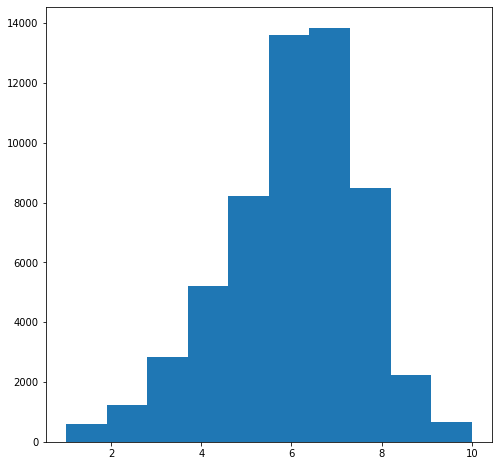

In [29]:
# Remove any rows without user reviews
games = games[games['users_rated'] > 0]

# Remove any rows with missing values
games.dropna(axis=0, inplace=True)

# Make a histogram of all the average ratings
plt.hist(games['average_rating']);

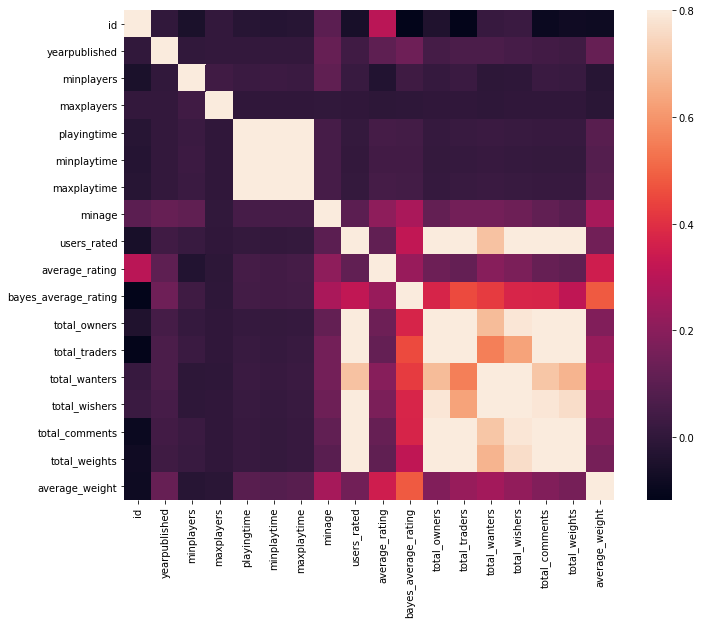

In [31]:
# Correlation matrix
corrmat = games.corr()

fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## Preprocess Dataset

In [32]:
# Get all the columns from the dataFrame
columns = games.columns.tolist()

# Filter the columns to remove data we don't want
columns = [c for c in columns if c not in ['bayes_average_rating', 'average_rating', 'type', 'name', 'id']]

# Store the variable we'll be predicting on
target = 'average_rating'

In [33]:
# Generate training and test datasets
train = games.sample(frac=0.8, random_state=1)
test = games.loc[~games.index.isin(train.index)]

# Print shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


## Build Linear Regression Model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model class
lr = LinearRegression()

# Fit the model with training data
lr.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# Generate prediction for the test set
predictions = lr.predict(test[columns])

# Compute error between test predictions and actual values
print('MSE : {}'.format(mean_squared_error(predictions, test[target])))

MSE : 2.0788190326293257


## Build Non-Linear Regression (RandomForestRegressor) Model

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model class
rfr = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

# Fit the model with training data
rfr.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [39]:
# Generate prediction for the test set
predictions = rfr.predict(test[columns])

# Compute error between test predictions and actual values
print('MSE : {}'.format(mean_squared_error(predictions, test[target])))

MSE : 1.4458560046071653


As a result, we can get more improved result from non-linear regression rather than linear regression model.

## Validate the model with individual test set

In [45]:
test[columns].iloc[1]

yearpublished      2008.0000
minplayers            1.0000
maxplayers            5.0000
playingtime         200.0000
minplaytime         100.0000
maxplaytime         200.0000
minage               12.0000
users_rated       15774.0000
total_owners      16429.0000
total_traders       205.0000
total_wanters      1343.0000
total_wishers      5149.0000
total_comments     3458.0000
total_weights      1450.0000
average_weight        3.7531
Name: 14, dtype: float64

In [46]:
# Make prediction with both models
rating_lr = lr.predict(test[columns].iloc[1].values.reshape(1, -1))
rating_rfr = rfr.predict(test[columns].iloc[1].values.reshape(1, -1))

# Print out the predictions
print(rating_lr)
print(rating_rfr)

[9.20860328]
[7.85532168]


In [47]:
# Actual value
print(test[target].iloc[1])

7.99115
